<a href="https://colab.research.google.com/github/rameelarustam47/-Evapotranspiration-Analysis-Along-Jhang-Branch-Using-QGIS-/blob/main/ET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Upload raster file
from google.colab import files
uploaded = files.upload()

raster_file = list(uploaded.keys())[0]

# Open raster
with rasterio.open(raster_file) as src:
    band1 = src.read(1)  # read the first band
    profile = src.profile
    print("Raster profile:", profile)
    print("ET min:", np.min(band1), "ET max:", np.max(band1))


Saving FSD_Seasonal_ET_2024.tif to FSD_Seasonal_ET_2024.tif
Saving FSD_Seasonal_ET_2023.tif to FSD_Seasonal_ET_2023.tif
Saving FSD_Seasonal_ET_2022.tif to FSD_Seasonal_ET_2022.tif
Raster profile: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 455, 'height': 321, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004491576420597608, 0.0, 71.61369445000825,
       0.0, -0.004491576420597608, 31.97104096181377), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
ET min: nan ET max: nan


In [5]:
uploaded = files.upload()  # Upload all 3 rasters at once
raster_files = list(uploaded.keys())
raster_files  # This will list the names


Saving FSD_Seasonal_ET_2024.tif to FSD_Seasonal_ET_2024 (1).tif
Saving FSD_Seasonal_ET_2023.tif to FSD_Seasonal_ET_2023 (1).tif
Saving FSD_Seasonal_ET_2022.tif to FSD_Seasonal_ET_2022 (2).tif


['FSD_Seasonal_ET_2024 (1).tif',
 'FSD_Seasonal_ET_2023 (1).tif',
 'FSD_Seasonal_ET_2022 (2).tif']

In [12]:
import rasterio
import numpy as np

rasters = []
for file in raster_files:
    with rasterio.open(file) as src:
        band = src.read(1).astype(float)  # read first band as float
        nodata = src.nodata
        if nodata is not None:
            band[band == nodata] = np.nan  # mask NoData
        rasters.append(band)

rasters = np.array(rasters)  # shape: (3, height, width)
print("Raster shape:", rasters.shape)


Raster shape: (3, 321, 455)


In [13]:
years = [2022, 2023, 2024]

for i, year in enumerate(years):
    max_et = np.nanmax(rasters[i])
    mean_et = np.nanmean(rasters[i])
    print(f"Year {year}: max ET = {max_et:.2f}, mean ET = {mean_et:.2f}")


Year 2022: max ET = 321.10, mean ET = 115.83
Year 2023: max ET = 273.60, mean ET = 101.79
Year 2024: max ET = 332.90, mean ET = 126.84


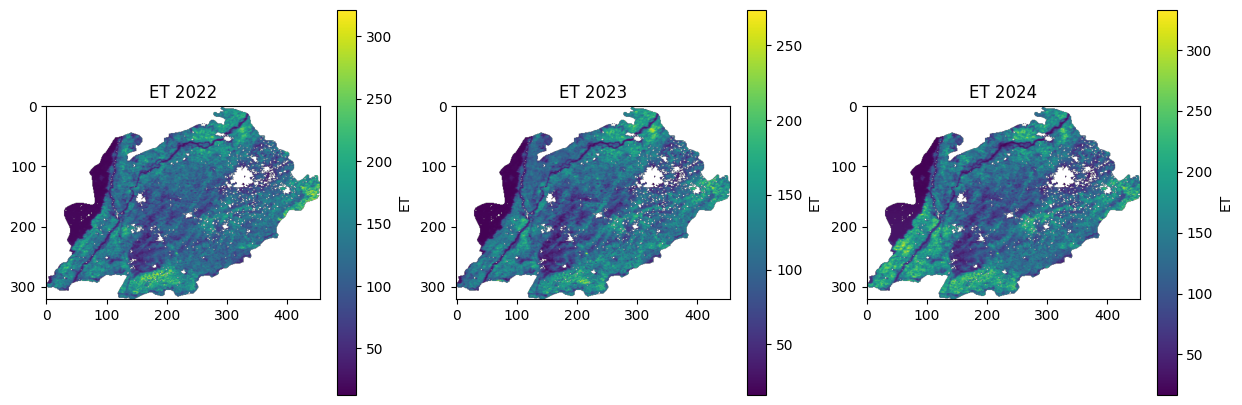

In [16]:
plt.figure(figsize=(15,5))
for i, year in enumerate(years):
    plt.subplot(1,3,i+1)
    plt.imshow(rasters[i], cmap='viridis')
    plt.colorbar(label='ET')
    plt.title(f'ET {year}')
plt.show()
